# To do
- [ ] Clean up headers

# Setup

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #Had to add it to the environment

# ifeu environment foodprint

In [14]:
df_foodprint = pd.read_table("data/ifeu_environment_foodprint.tsv")

## EDA 1 - Getting to know the data

In [18]:
df_foodprint.columns

Index(['food', 'co2_footprint', 'category', 'phosphate_rock_footprint',
       'land_use_footprint', 'water_footprint', 'energy_demand', 'comments'],
      dtype='object')

In [15]:
df_foodprint

,food,co2_footprint,category,phosphate_rock_footprint,land_use_footprint,water_footprint,energy_demand,comments
0,"Apple (organic), average",0.2,Fruit and vegetables,NaN,NaN,NaN,NaN,NaN
1,"Apple, average",0.3,Fruit and vegetables,1.0,0.1,1500,0.8,NaN
2,"Apple, from New Zealand",0.8,Fruit and vegetables,NaN,NaN,NaN,NaN,NaN
3,"Apple, regional in April",0.4,Fruit and vegetables,NaN,NaN,NaN,NaN,NaN
4,"Apple, regional in autumn",0.3,Fruit and vegetables,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
182,"Juice, orange juice, 1.0 L composite carton",0.7,Beverages,5.0,0.2,40000,3.0,NaN
183,"Lemonade, orange lemonade,0.75 L disposable pl...",0.4,Beverages,NaN,NaN,NaN,NaN,NaN
184,"Mineral water, 0.7 L returnable glass bottle",0.2,Beverages,NaN,NaN,NaN,NaN,NaN
185,"Water, tap water",0.0,Beverages,NaN,NaN,NaN,NaN,NaN


In [16]:
df_foodprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food                      187 non-null    object 
 1   co2_footprint             186 non-null    float64
 2   category                  187 non-null    object 
 3   phosphate_rock_footprint  35 non-null     float64
 4   land_use_footprint        35 non-null     float64
 5   water_footprint           35 non-null     object 
 6   energy_demand             34 non-null     float64
 7   comments                  6 non-null      object 
dtypes: float64(4), object(4)
memory usage: 11.8+ KB


In [17]:
round(df_foodprint.describe())

,co2_footprint,phosphate_rock_footprint,land_use_footprint,energy_demand
count,186.0,35.0,35.0,34.0
mean,2.0,50.0,430.0,6.0
std,3.0,68.0,2535.0,7.0
min,0.0,0.0,0.0,1.0
25%,0.0,7.0,0.0,2.0
50%,1.0,20.0,1.0,4.0
75%,3.0,60.0,2.0,6.0
max,22.0,300.0,15000.0,40.0


In [13]:
df_foodprint.food.hist('co2_footprint');

KeyError: 'co2_footprint'

In [10]:
df_ingredients[['Food product'],['Total_emissions'].hist()

SyntaxError: unexpected EOF while parsing (<ipython-input-10-c47617ea5315>, line 1)

KeyError: 'Food product'

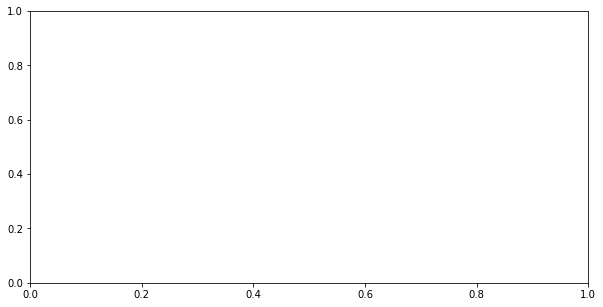

In [11]:
# Bar Chart

fig, ax = plt.subplots(figsize=(10,5))
(
    df_ingredients['Food product']
    .groupby('Total_emissions') # aggregate data to level of airline
    #.count()['FL_DATE'] # count the observations
    .sort_values() # sort the values in descending
    .plot.barh() # Make a bar chart based on the dataframe
)
ax.set_title('Flight Volume by Airline in the USA April 2020')

ax.set_xlabel('Count of Flights');
ax.set_ylabel('Airline Unique Code');

# FAO

In [22]:
df_emissions = pd.read_csv("data/Emissions_Agriculture_Agriculture_total_E_All_Data_(Normalized).csv")

In [27]:
df_emissions.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')

### Clean up the headers

In [36]:
# make a list column names
cols = df_emissions.columns.tolist()
# replace space with _
cols = [col.replace(' ', '_').lower() for col in cols]
# reassign new column names to dataframe
df_emissions.columns = cols

## EDA 1 - Getting to know the data

In [37]:
df_emissions

,area_code,area,item_code,item,element_code,element,year_code,year,unit,value,flag,note
0,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1961,1961,gigagrams,240.6831,A,NaN
1,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1962,1962,gigagrams,245.3106,A,NaN
2,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1963,1963,gigagrams,255.8285,A,NaN
3,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1964,1964,gigagrams,259.0650,A,NaN
4,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1965,1965,gigagrams,265.5980,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
523656,5873,OECD,1709,Agricultural Soils,7243,Emissions (CO2eq) from N2O,2016,2016,gigagrams,515243.7721,A,NaN
523657,5873,OECD,1709,Agricultural Soils,7243,Emissions (CO2eq) from N2O,2017,2017,gigagrams,516924.3036,A,NaN
523658,5873,OECD,1709,Agricultural Soils,7243,Emissions (CO2eq) from N2O,2018,2018,gigagrams,513827.4768,A,NaN
523659,5873,OECD,1709,Agricultural Soils,7243,Emissions (CO2eq) from N2O,2030,2030,gigagrams,524388.0749,A,NaN


In [39]:
df_emissions.shape

(523661, 12)

In [40]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523661 entries, 0 to 523660
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area_code     523661 non-null  int64  
 1   area          523661 non-null  object 
 2   item_code     523661 non-null  int64  
 3   item          523661 non-null  object 
 4   element_code  523661 non-null  int64  
 5   element       523661 non-null  object 
 6   year_code     523661 non-null  int64  
 7   year          523661 non-null  int64  
 8   unit          523661 non-null  object 
 9   value         523661 non-null  float64
 10  flag          523661 non-null  object 
 11  note          0 non-null       float64
dtypes: float64(2), int64(5), object(5)
memory usage: 47.9+ MB
